# Atlanta Allergy Pollen Count Tracking Over Time
### Script Author: Siran He | 2025-Mar-06 to Present

### Import modules & set up environemnt

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load data

In [3]:
df_pollen = pd.read_csv("../data/pollen_count_atl.csv")
df_pollen.head()

,DATE,TREES,YEAR
0,1/1/23,NaN,2023
1,1/2/23,NaN,2023
2,1/3/23,1.0,2023
3,1/4/23,1.0,2023
4,1/5/23,29.0,2023


### Quick checks of the data

In [4]:
df_pollen.info()
df_pollen.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1096 non-null   object 
 1   TREES   571 non-null    float64
 2   YEAR    1096 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 25.8+ KB


(1096, 3)

In [4]:
# Confirm dates are correct format
df_pollen['date_dt'] = pd.to_datetime(df_pollen['DATE'], format='%m/%d/%y', errors='coerce')
print(df_pollen['date_dt'].dtypes)

datetime64[ns]


In [5]:
# Check date range
df_pollen['date_dt'].min() # 2023-01-01, correct
df_pollen['date_dt'].max() # 2025-12-31, correct (may extend in the future)

Timestamp('2023-01-01 00:00:00')

Timestamp('2025-12-31 00:00:00')

### Exploratory plots

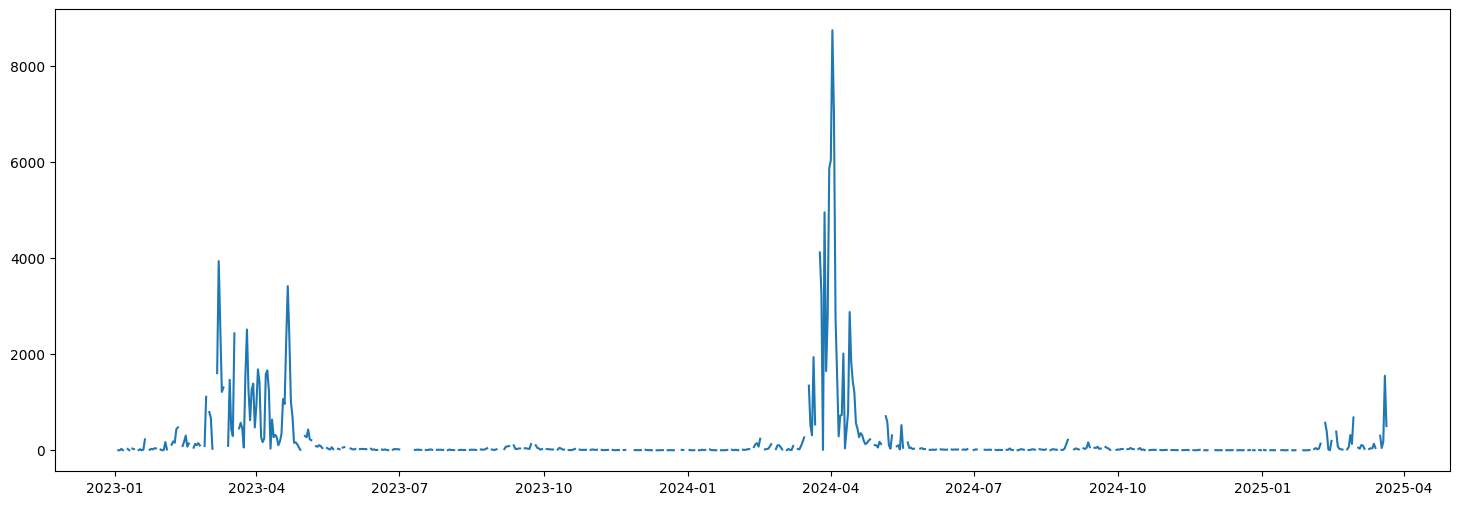

In [6]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df_pollen['date_dt'], df_pollen['TREES']);  

# This is fully longitudinally data, which is ok as is;
# However, we'd prefer to overlay year by year plot instead

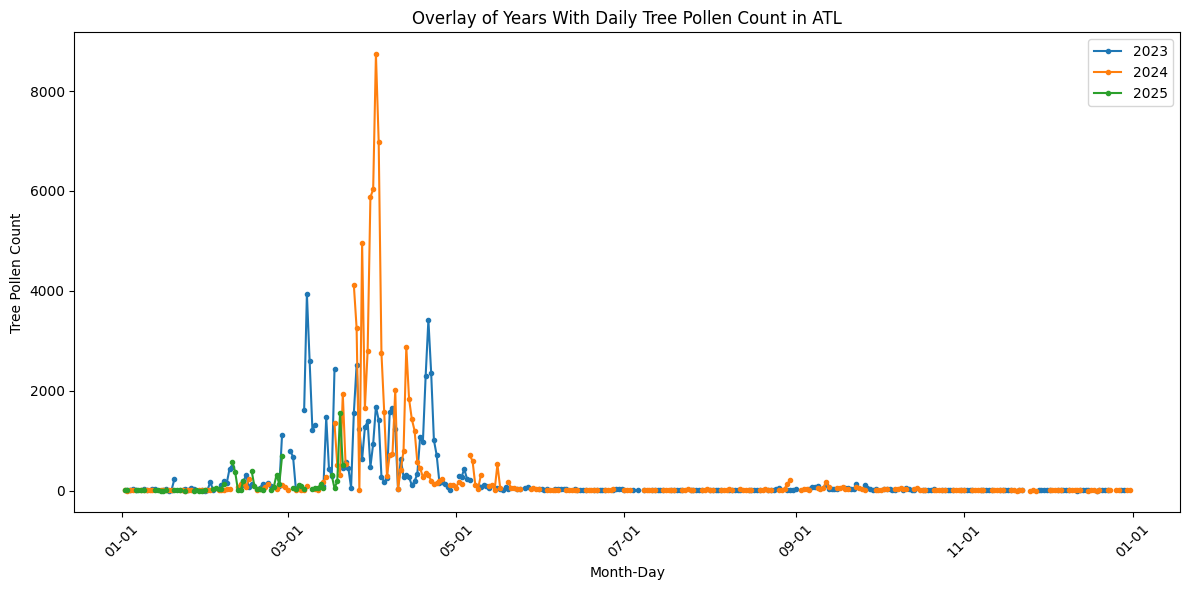

In [9]:
# Normalize dates to the year 2000 (a leap year)
df_pollen['normalized_date'] = df_pollen['date_dt'].apply(lambda dt: dt.replace(year=2000))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

## Original plot code without dynamic colors:
for year, group in df_pollen.groupby('YEAR'):
    ax.plot(group['normalized_date'], group['TREES'], marker='.', linestyle='-', label=year)
    
# Format the x-axis to show month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# # set date range (other wise shows up as 1/1 to 1/1)
# start_date = datetime.datetime.strptime('01-01', '%m-%d')
# end_date = datetime.datetime.strptime('12-31', '%m-%d')
# plt.xlim(mdates.date2num(start_date), mdates.date2num(end_date))

# Add labels and title
ax.set_xlabel('Month-Day')
ax.set_ylabel('Tree Pollen Count')
ax.set_title('Overlay of Years With Daily Tree Pollen Count in ATL')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show();

In [10]:
fig.savefig('../output/static_tracking_plot.png', bbox_inches='tight')

### Interactive plots

In [11]:
# Normalize dates to the year 2000 (a leap year)
df_pollen['normalized_date'] = df_pollen['date_dt'].apply(lambda dt: dt.replace(year=2000))

# Generate a colormap based on the number of unique years
unique_years = sorted(df_pollen['YEAR'].unique())  
colors = px.colors.sample_colorscale("viridis", [i / max(1, len(unique_years) - 1) for i in range(len(unique_years))])
color_map = {year: colors[i] for i, year in enumerate(unique_years)}

# Create a single figure
fig_dynamic = go.Figure()

# Group data by year and add traces
for year in unique_years:
    group = df_pollen[df_pollen['YEAR'] == year]
    fig_dynamic.add_trace(go.Scatter(
        x=group['normalized_date'], 
        y=group['TREES'], 
        mode='lines+markers',
        line=dict(color=color_map[year]),
        name=str(year)
    ))

# Format x-axis
tickvals = [datetime.datetime(2000, month, 1) for month in range(1, 13)]
ticktext = [dt.strftime('%m-%d') for dt in tickvals]
fig_dynamic.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=tickvals,
        ticktext=ticktext
    ),
    xaxis_title='Month-Day',
    yaxis_title='Tree Pollen Count',
    title='Overlay of Years With Daily Tree Pollen Count in ATL',
    legend_title='Year',
)

# Show figure
fig_dynamic.show();

In [ ]:
fig_dynamic.write_html("../output/dynamic_tracking_plot.html")

In [13]:
fig_dynamic.write_html("test.html")